## Exploring dataset
This notebook is intended for exploring the dataset (images and metadata).

For this notebook to find the new modules created for this project, we need to set its path to be in the root directory.

In [1]:
import sys
sys.path.append("../")

## Generate image statistics

1. Read the images from the folder
2. Store the results in a CSV file
3. Read images statistics from the generated CSV file
4. Get dataset statistics
5. Plot histogram for the data in dataset
6. Check the unique sources from metadata file


In [2]:
from src.preprocessing.image_preprocessor import get_images_statistics,store_images_statistics,plot_images_statistics
import pandas as pd

dataset = ['COVID','NORMAL','Viral_Pneumonia','Lung_Opacity']

Processing images for: COVID
Processing images for: NORMAL
Processing images for: Viral_Pneumonia
Processing images for: Lung_Opacity


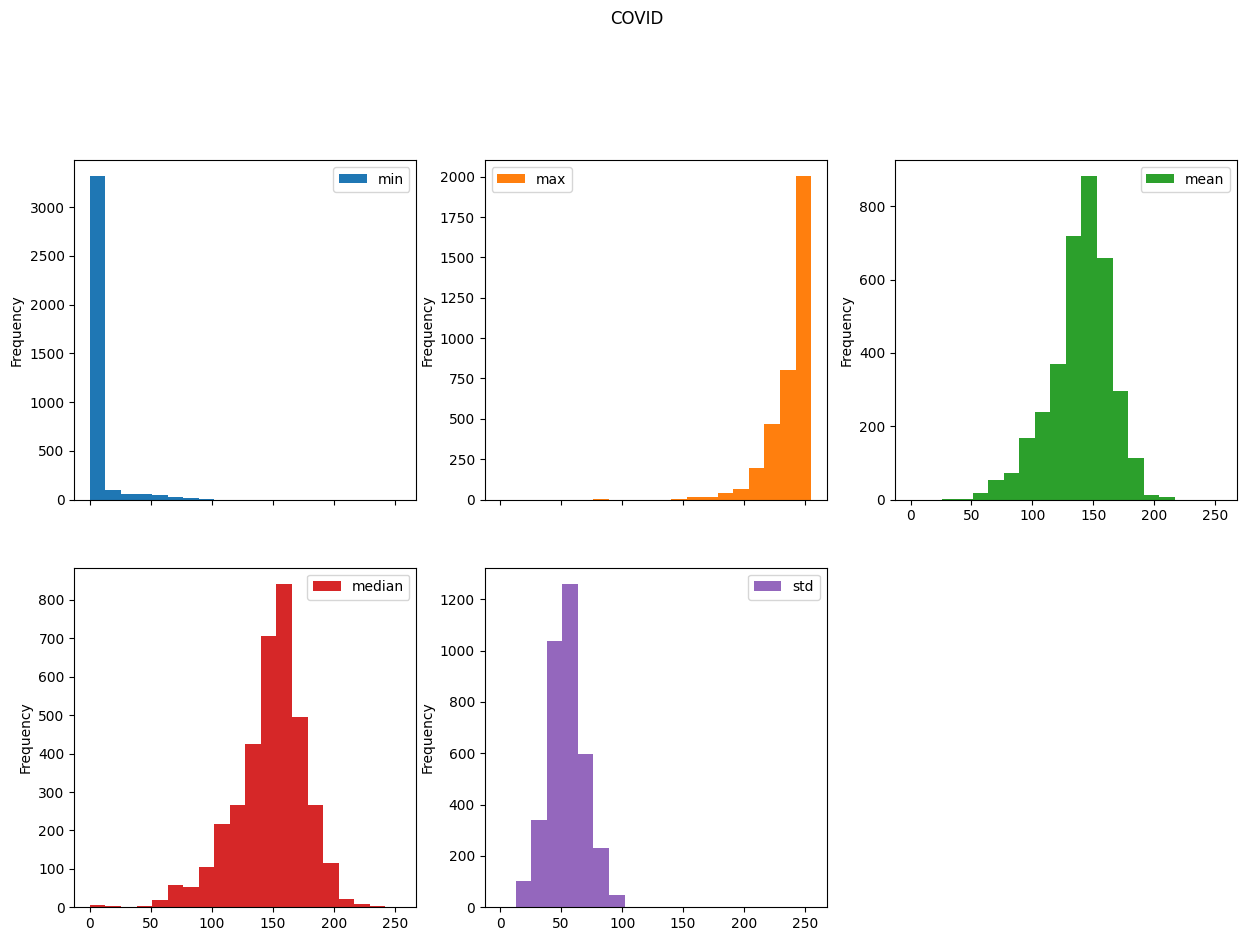

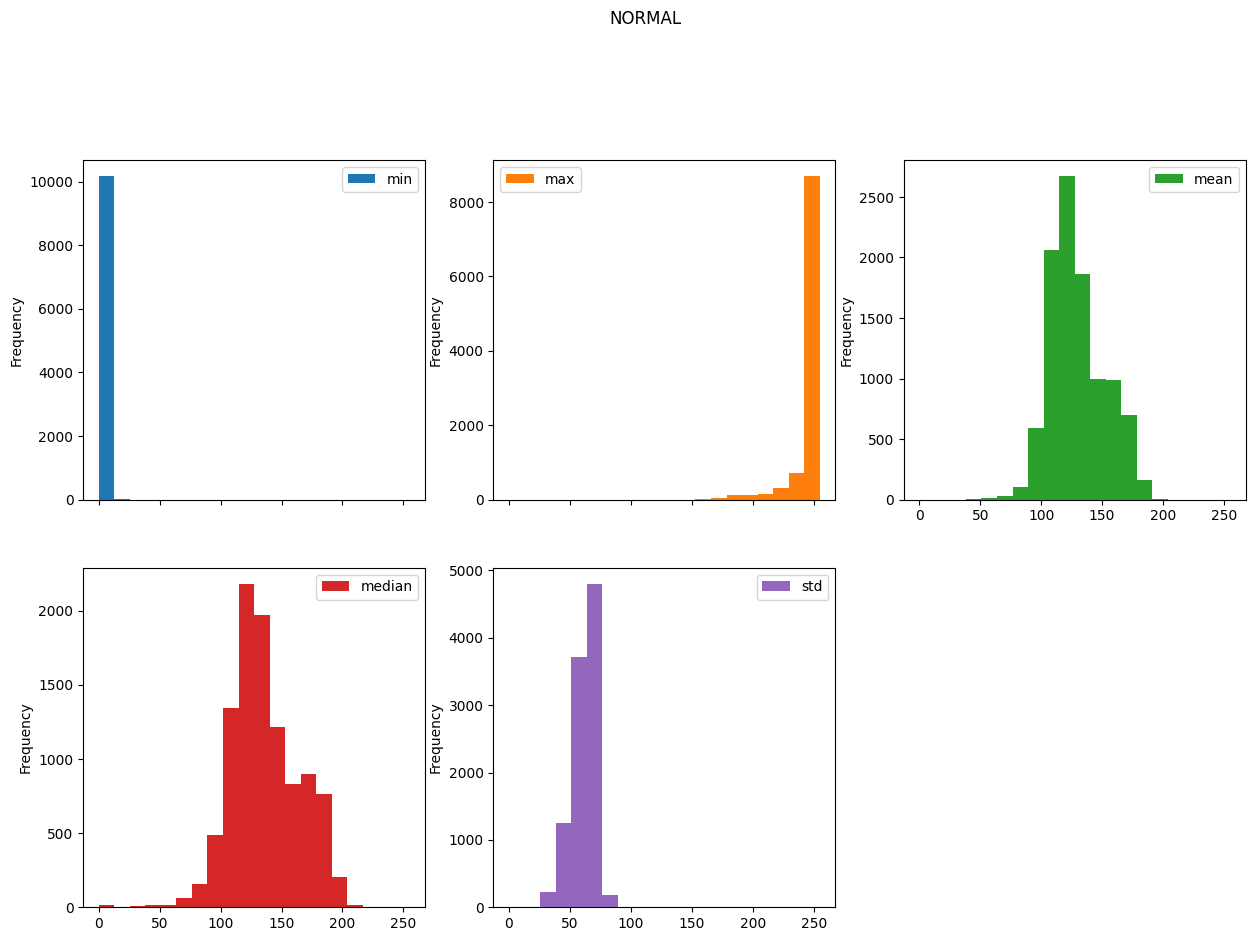

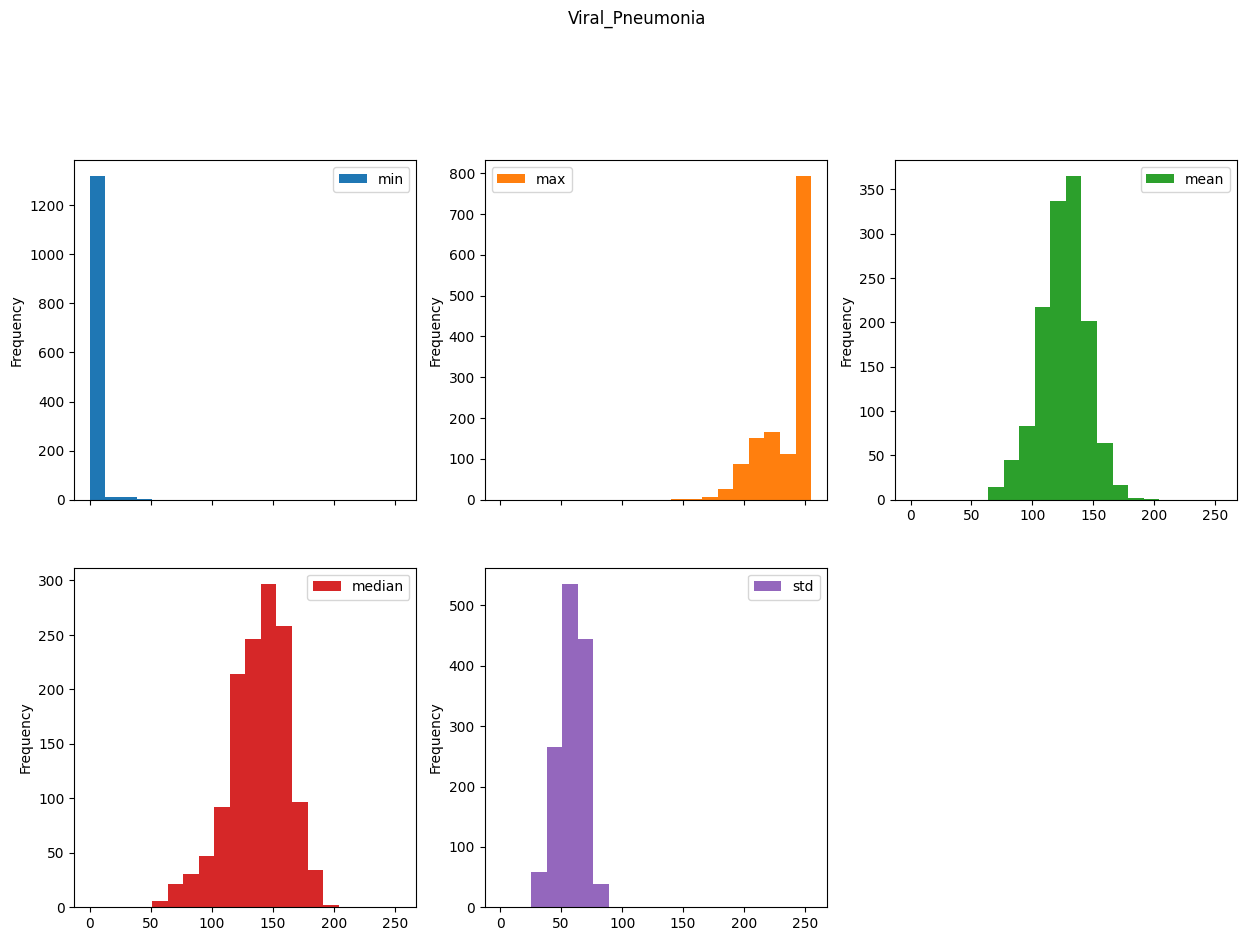

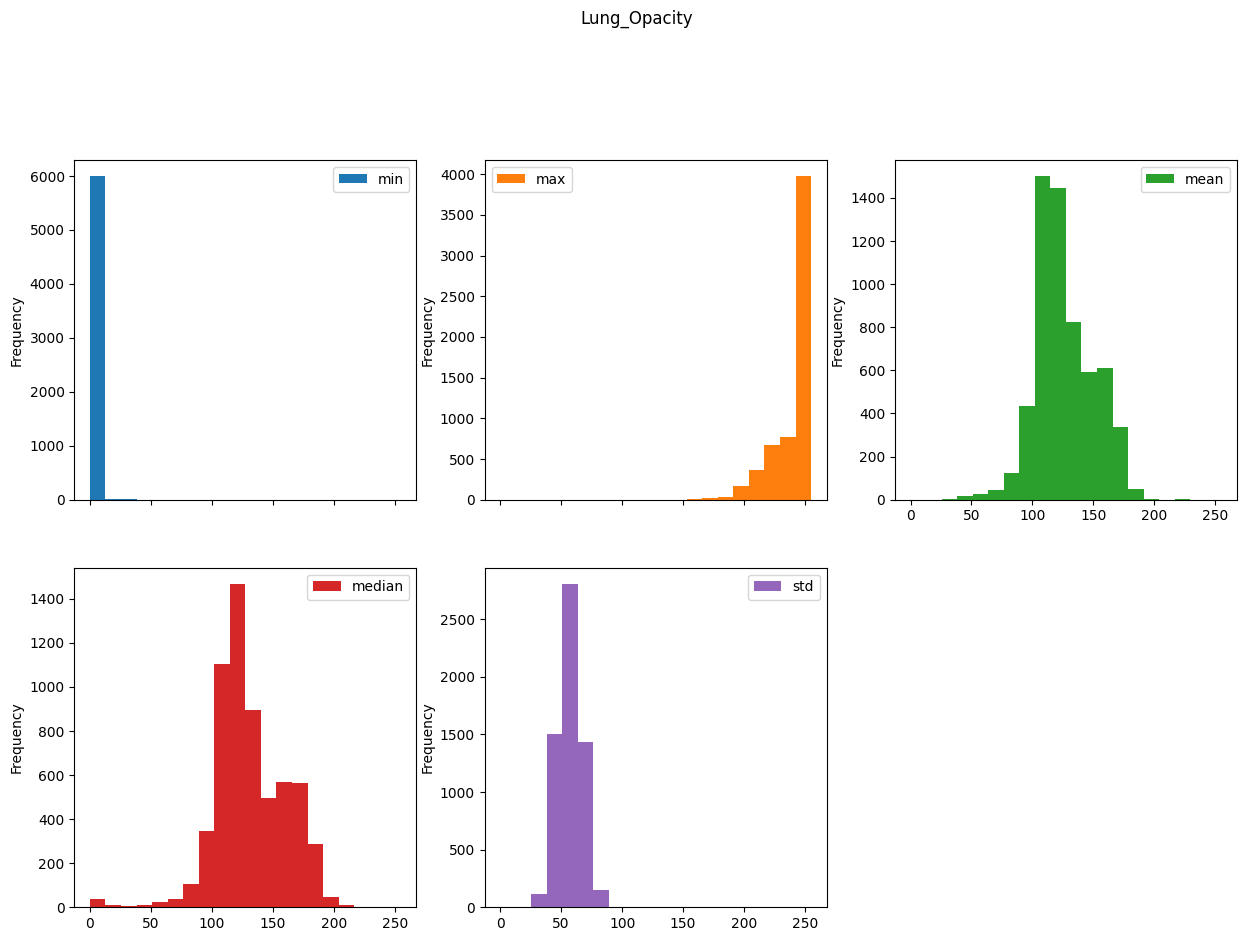

In [3]:
for i in dataset:
    print('Processing images for:',i)
    image_stats = get_images_statistics('../../COVID-19_Radiography_Dataset/'+i+'/images')
    filename =  '../data/preprocessed/'+i.lower()+'_images_statistics.csv'
    store_images_statistics(image_stats,filename)
    plot_images_statistics(i,filename)


## Find dataset sources

In [8]:
for i in dataset:
    stats = pd.read_csv('../data/raw/'+i.lower()+'_metadata.csv', index_col=0)
    display(i, 'Number of sources '+str(len( stats.URL.unique())),  stats.URL.unique())

'COVID'

'Number of sources 6'

array(['https://sirm.org/category/senza-categoria/covid-19/',
       'https://github.com/ml-workgroup/covid-19-image-repository/tree/master/png',
       'https://eurorad.org', 'https://github.com/armiro/COVID-CXNet',
       'https://github.com/ieee8023/covid-chestxray-dataset',
       'https://bimcv.cipf.es/bimcv-projects/bimcv-covid19/#1590858128006-9e640421-6711'],
      dtype=object)

'NORMAL'

'Number of sources 2'

array(['https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data',
       'https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia'],
      dtype=object)

'Viral_Pneumonia'

'Number of sources 1'

array(['https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia'],
      dtype=object)

'Lung_Opacity'

'Number of sources 1'

array(['https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data'],
      dtype=object)

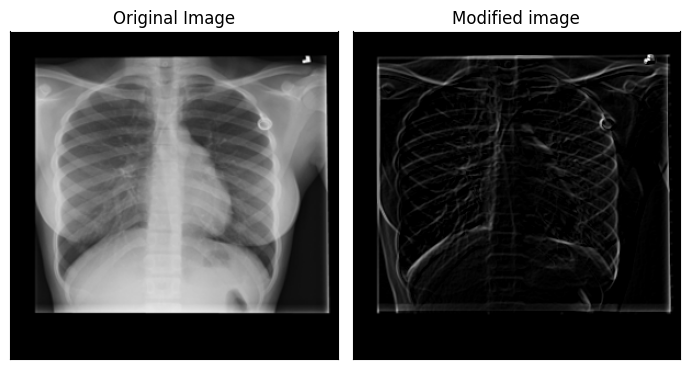

In [9]:
# Import the necessary Libraries
import cv2
from src.preprocessing.image_preprocessor import plot_image
 
# Read image from disk.
img = cv2.imread('../../COVID-19_Radiography_Dataset/Normal/images/normal-1.png')
#img = cv2.imread('../../COVID-19_Radiography_Dataset/COVID/images/covid-1.png')
# Convert BGR image to RGB
ddept=cv2.CV_8U

x = cv2.Sobel(img, ddept, 1,0, ksize=3, scale=1)
y = cv2.Sobel(img, ddept, 0,1, ksize=3, scale=1)
absx= cv2.convertScaleAbs(x)
absy = cv2.convertScaleAbs(y)
edge = cv2.addWeighted(absx, 0.5, absy, 0.5,0)

plot_image(img,edge)

Processing images for: COVID
Processing images for: NORMAL
Processing images for: Viral_Pneumonia
Processing images for: Lung_Opacity


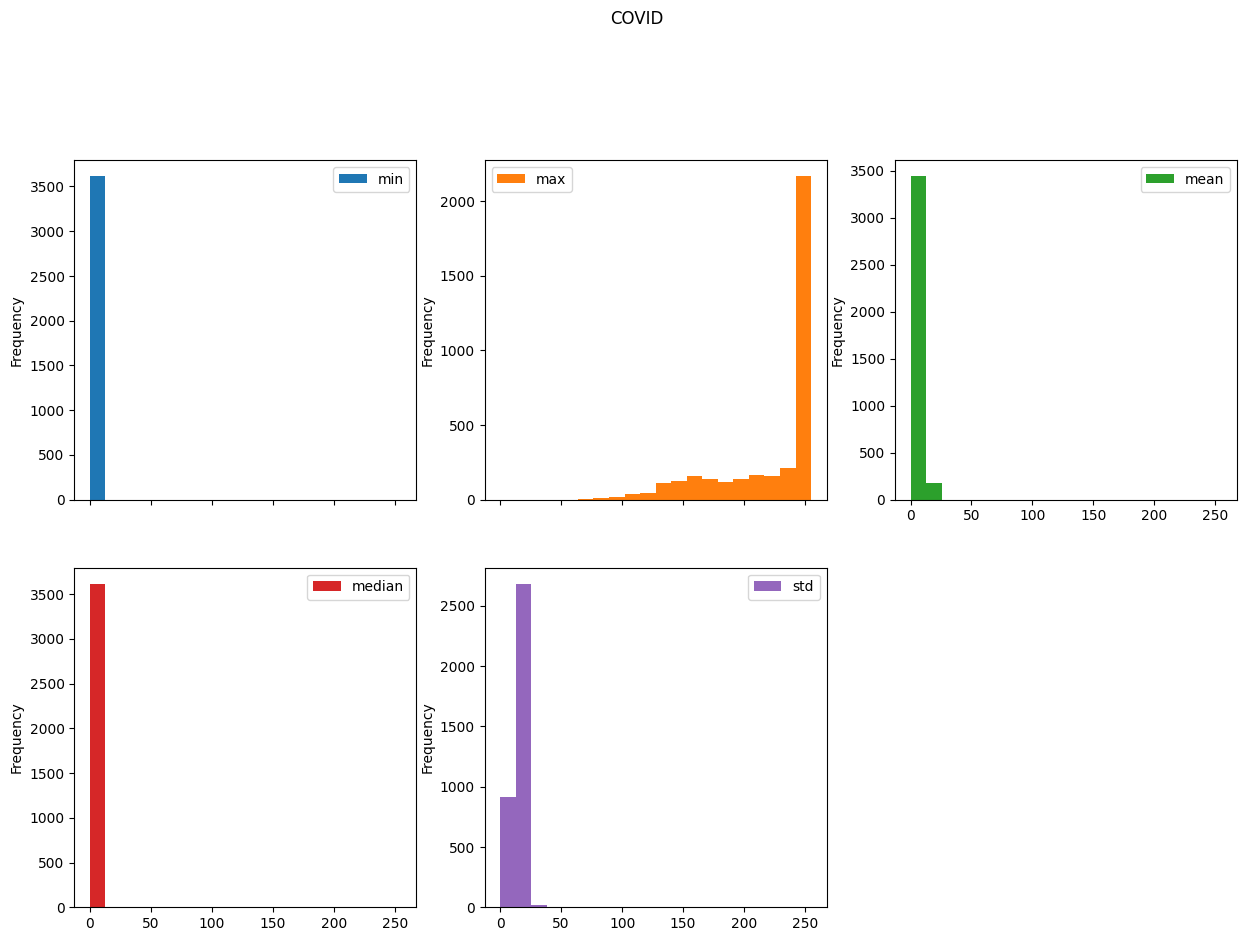

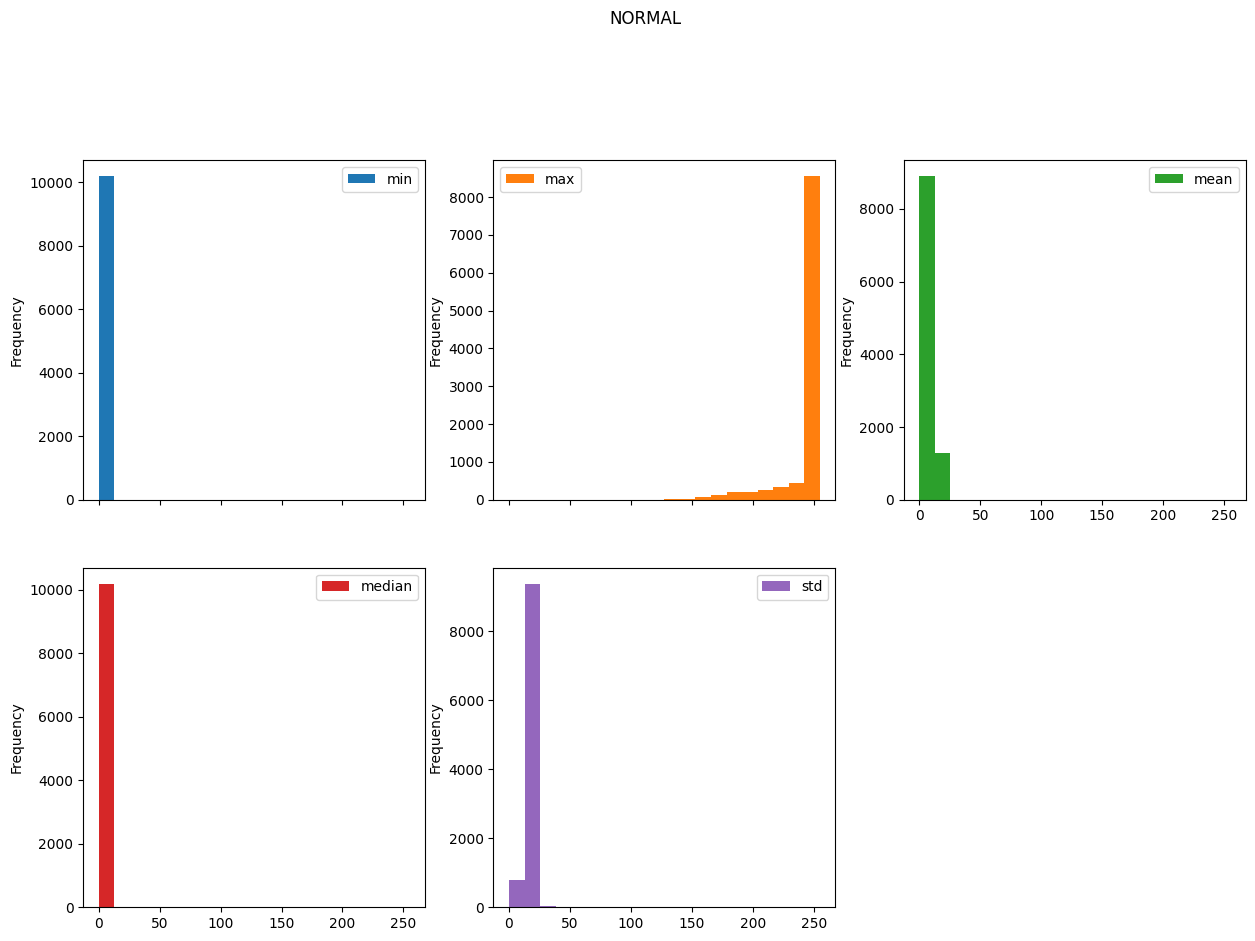

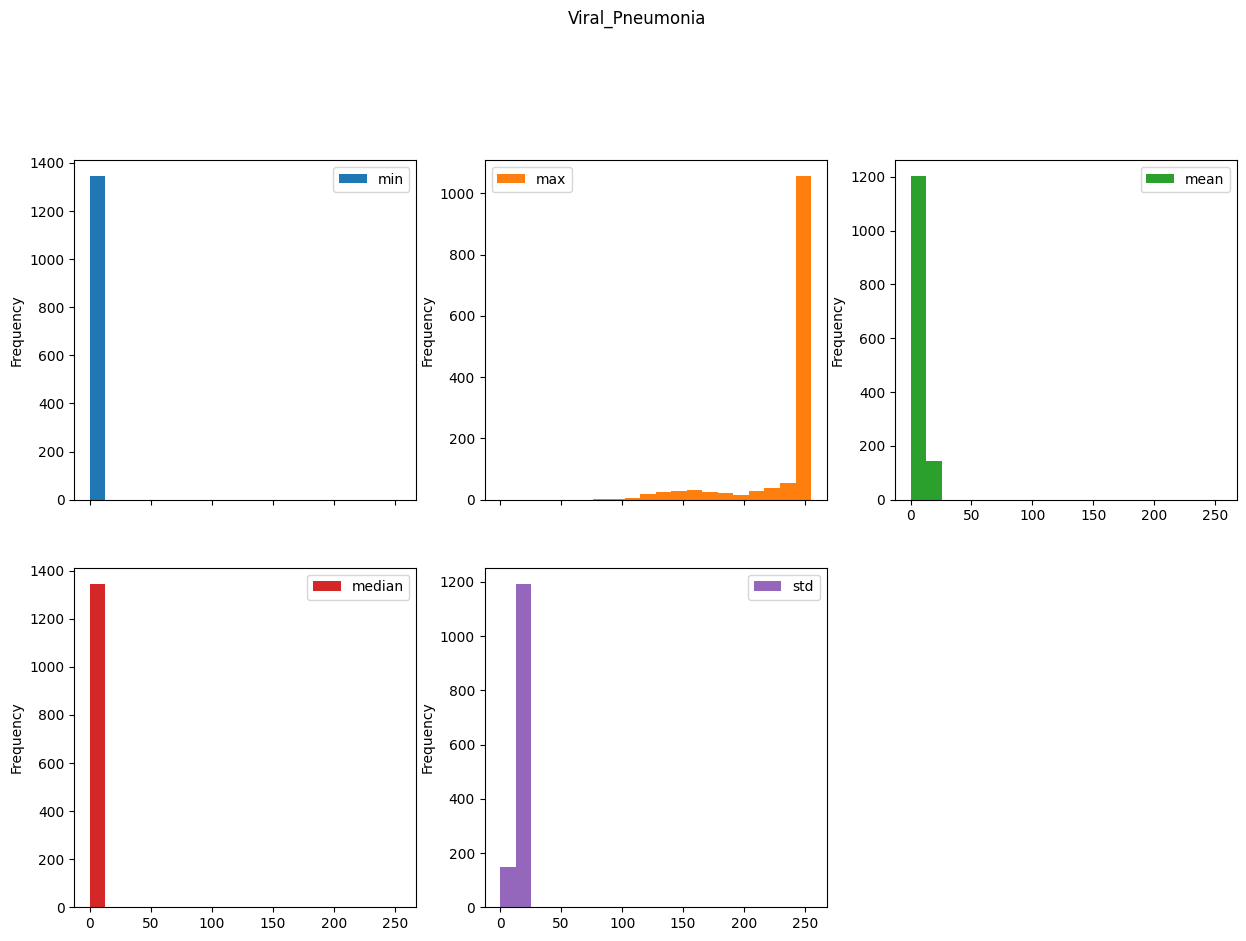

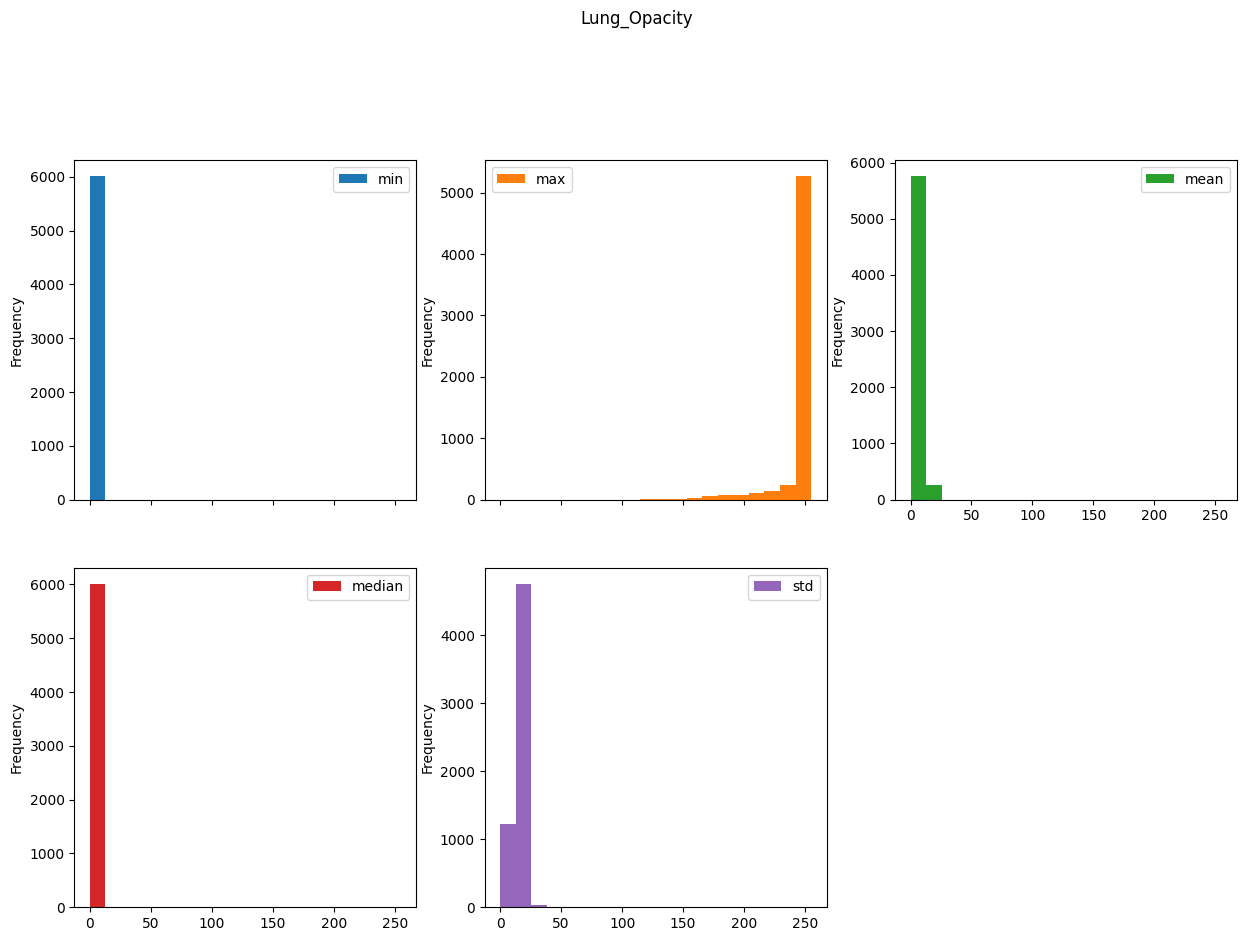

In [10]:
from src.preprocessing.image_preprocessor import get_images_edges_statistics,store_images_statistics

dataset = ['COVID','NORMAL','Viral_Pneumonia','Lung_Opacity']

for i in dataset:
    print('Processing images for:',i)
    image_stats = get_images_edges_statistics('../../COVID-19_Radiography_Dataset/'+i+'/images')
    filename =  '../data/preprocessed/'+i.lower()+'_images_edges_statistics.csv'
    store_images_statistics(image_stats,filename)
    plot_images_statistics(i,filename)